In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl
import certifi
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#load the dataset
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
#summary statistics for all numerical features
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


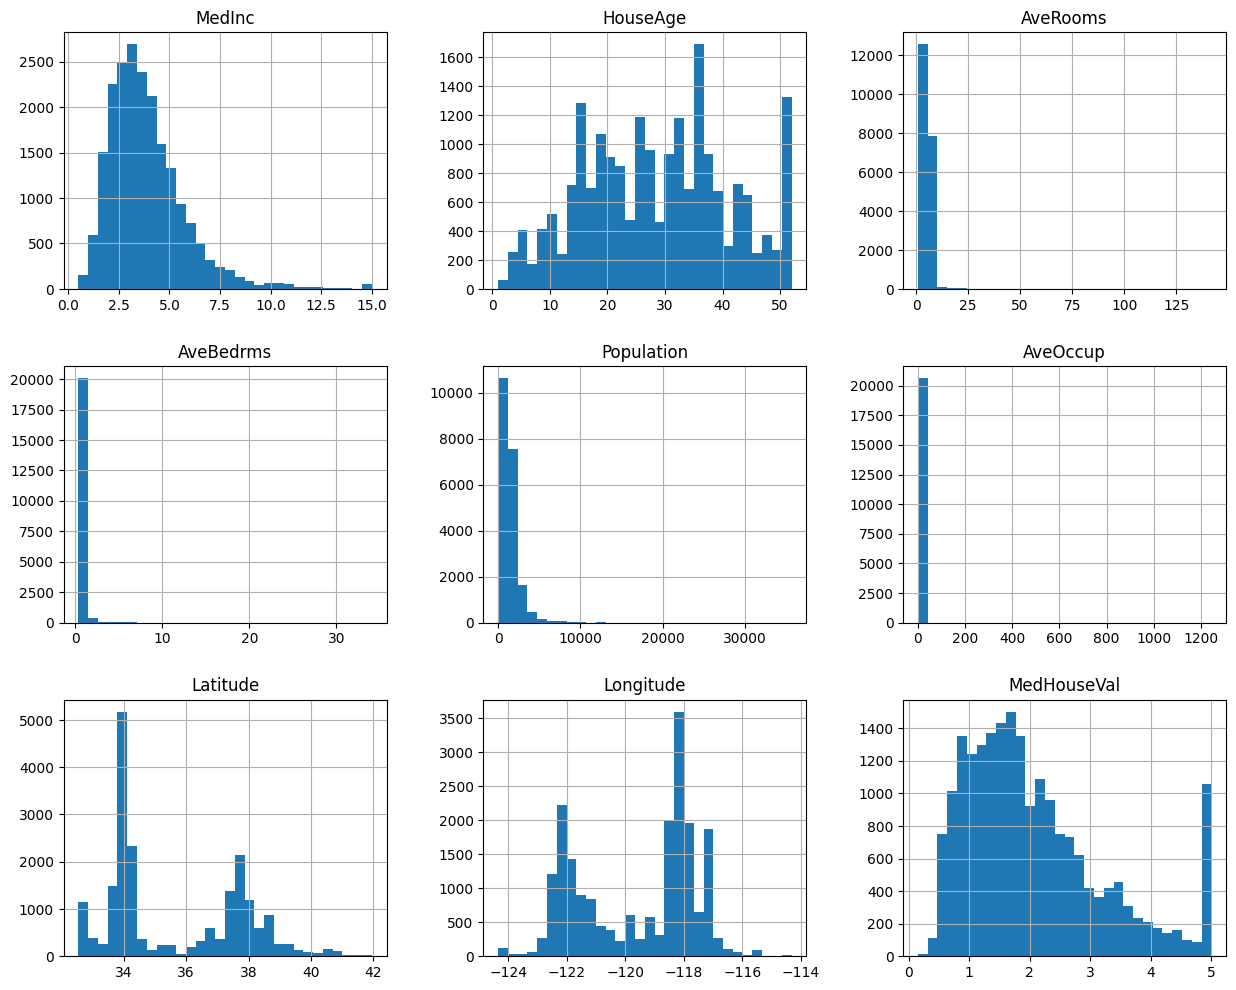

In [4]:
#histograms for all numerical features
df.hist(bins=30, figsize=(15,12))
plt.tight_layout
plt.show()

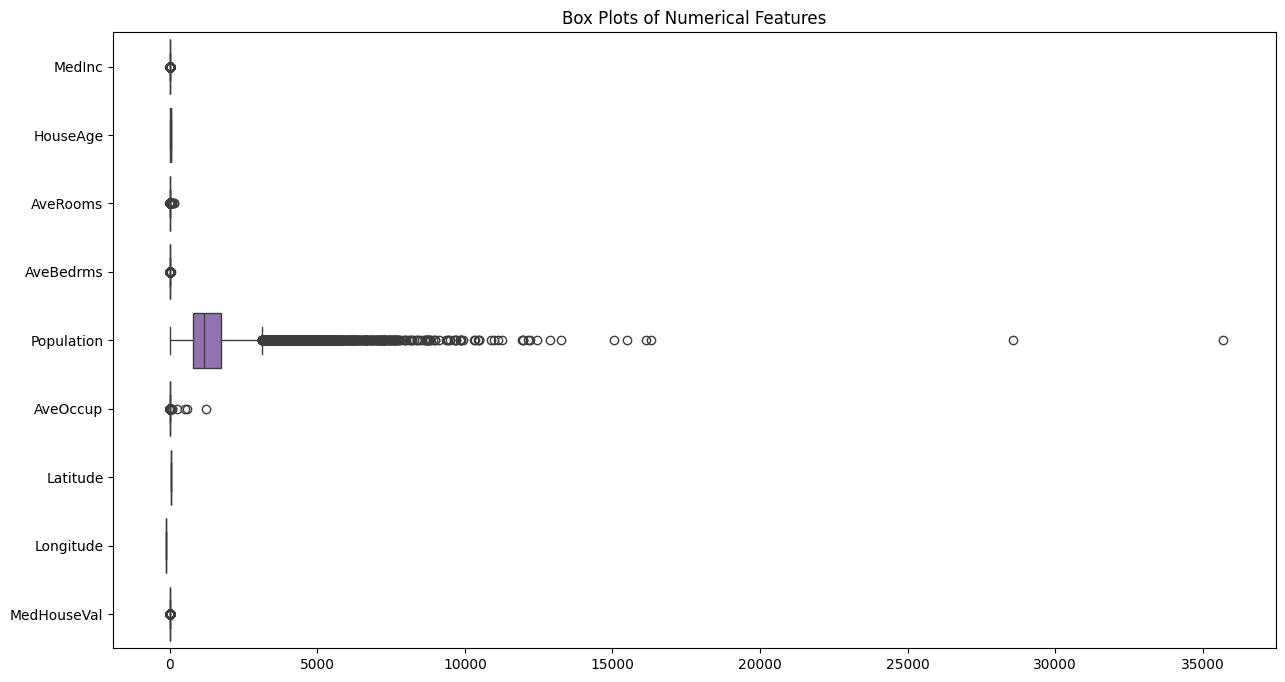

In [5]:
#box plots for numerical features 
plt.figure(figsize=(15,8))
sns.boxplot(data=df, orient="h")
plt.title("Box Plots of Numerical Features")
plt.show()

In [6]:
#correlation matrix
corr_matrix = df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


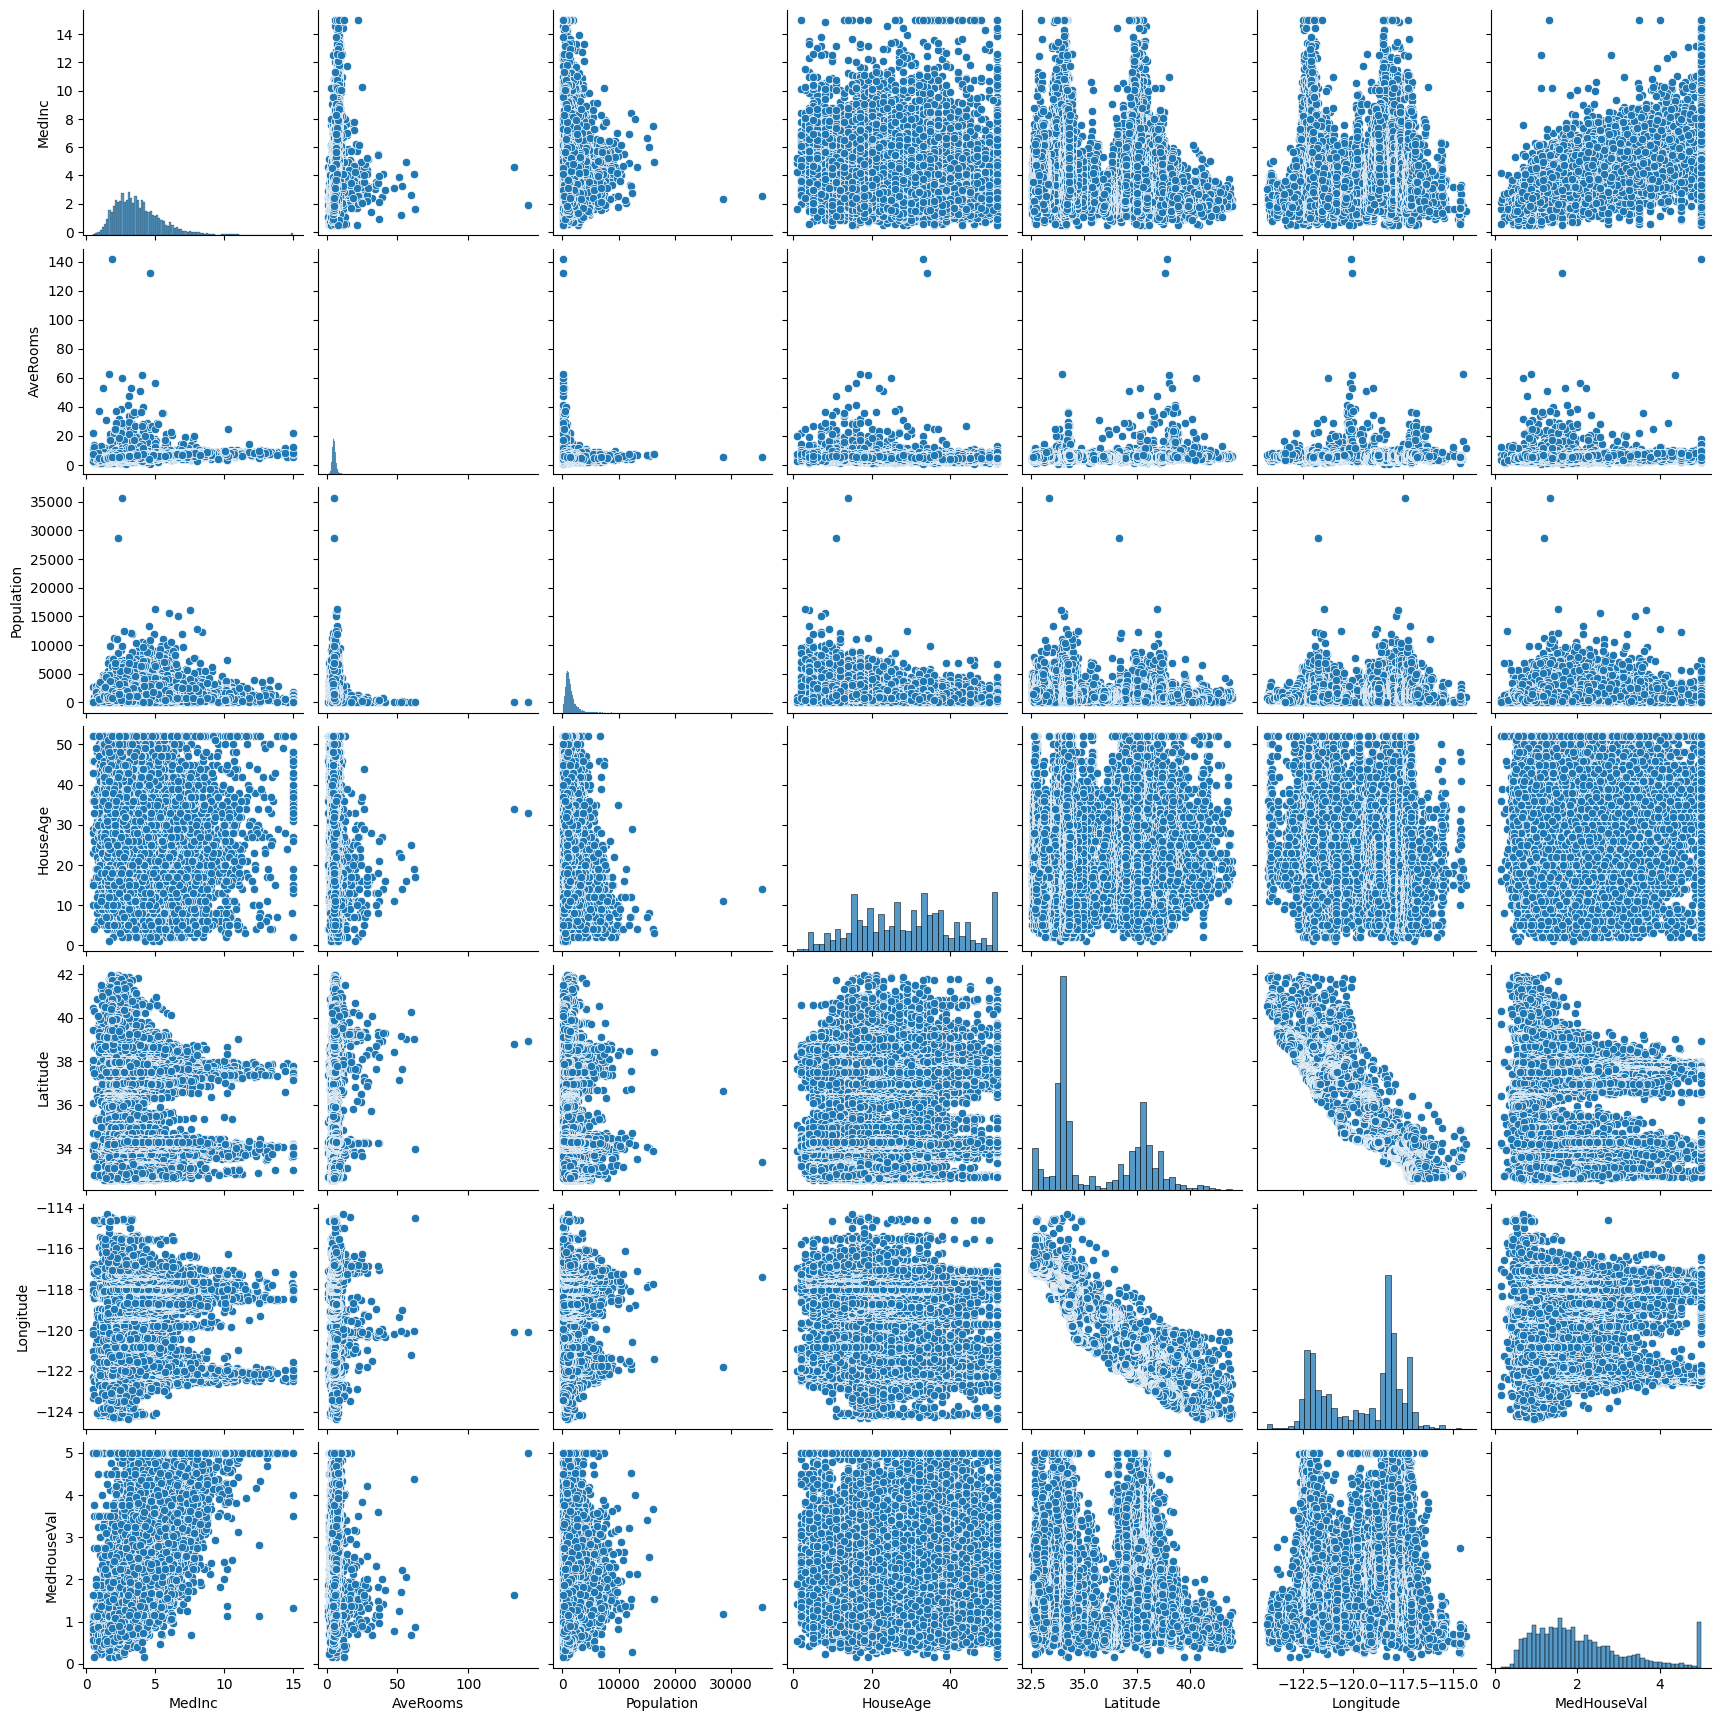

In [7]:
selected_features = [
    "MedInc",
    "AveRooms",
    "Population",
    "HouseAge",
    "Latitude",
    "Longitude",
    "MedHouseVal"
]
sns.pairplot(df[selected_features], diag_kind = "hist")
plt.show()

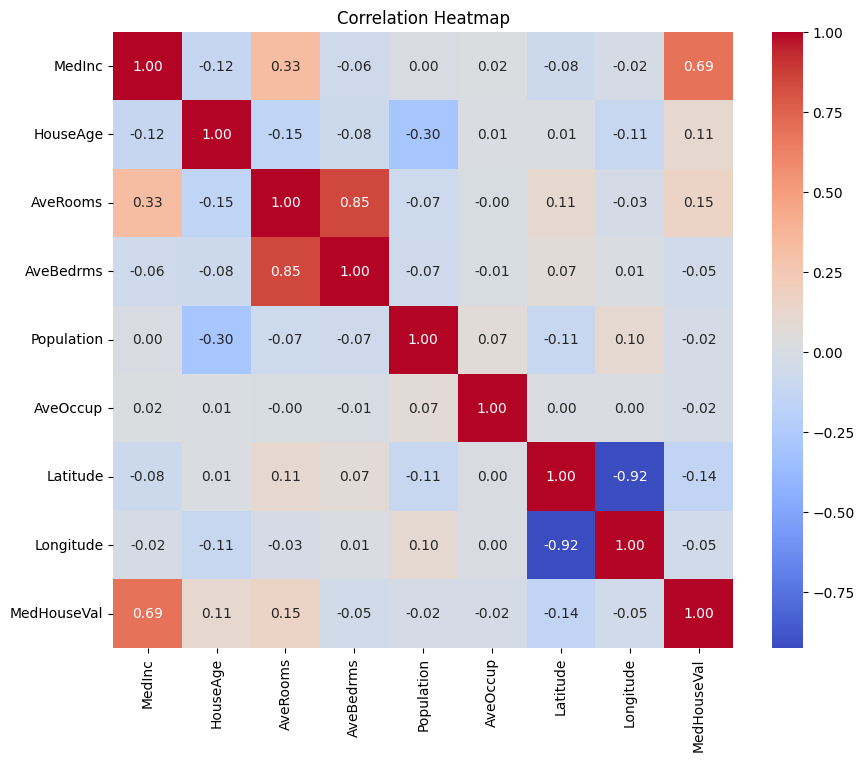

In [8]:
#heat map of correlations
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()


In [9]:
#Check for missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
#feature scaling
#separate features and target
X=df.drop("MedHouseVal", axis = 1)
y=df["MedHouseVal"]
#standardize featrues
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [11]:
#feature engeneering
#apply PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
#create dataframe
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df.head()

,PC1,PC2
0,1.882704,-0.503362
1,1.371120,-0.121406
2,2.086868,-0.501136
3,1.575801,-1.239495
4,1.591206,-1.345264


splitting the data into training and test sets

In [12]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size = 0.2,
    random_state = 42
)
print("X_train shape:", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape: (16512, 8)
X_test shape:  (4128, 8)
y_train shape:  (16512,)
y_test shape:  (4128,)


Linear regression being applied to predict median house values based on the standardized features

In [13]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

evaluate accuracy

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-Squared: {r2:.3f}")

Mean Absolute Error: 0.533
Mean Squared Error: 0.556
R-Squared: 0.576


set up neural network

In [15]:
#neural network architecture
nn_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver = 'adam',
    max_iter=500,
    random_state=42
)
#train the neural network
nn_model.fit(X_train, y_train)
#make predictions
y_nn_pred = nn_model.predict(X_test)

evaluate neural network performance

In [16]:
nn_mae = mean_absolute_error(y_test, y_nn_pred)
nn_mse = mean_squared_error(y_test, y_nn_pred)
nn_r2 = r2_score(y_test, y_nn_pred)
print(f"Neural Network Mean Absolute Error: {nn_mae:.3f}")
print(f"Neural Network Mean Sqaured Error: {nn_mse:.3f}")
print(f"Neural Network R-Squared Error: {nn_r2:.3f}")


Neural Network Mean Absolute Error: 0.339
Neural Network Mean Sqaured Error: 0.257
Neural Network R-Squared Error: 0.804


visualize predictions vs actuals

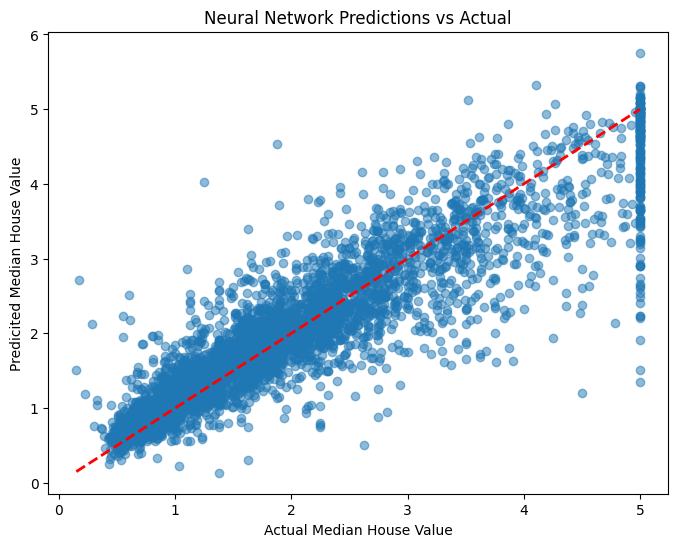

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_nn_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicited Median House Value")
plt.title("Neural Network Predictions vs Actual")
plt.show()

loss curve

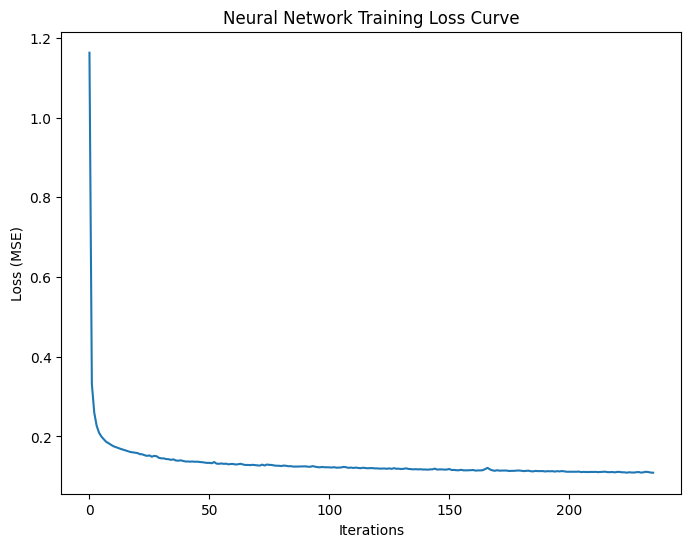

In [18]:
plt.figure(figsize = (8,6))
plt.plot(nn_model.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Neural Network Training Loss Curve")
plt.show()

random forest as baseline and xgboost for features as they relate to median house value

In [19]:
X = df[['AveRooms', 'AveOccup', 'Population', 'HouseAge']]
y = df['MedHouseVal']
#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)
#random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
#get baseline with random forest
print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R2:", r2_score(y_test, rf_pred))


Random Forest Performance
MAE: 0.7239117632267442
MSE: 0.885451557895242
R2: 0.32429373378998283


xgboost

In [20]:
xgb = XGBRegressor(
    n_estimators = 200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("XGBoost Performnce")
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("MSE:", mean_squared_error(y_test, xgb_pred))
print("R2:", r2_score(y_test, xgb_pred))

XGBoost Performnce
MAE: 0.7101973439515746
MSE: 0.8343094913661372
R2: 0.36332129493944787


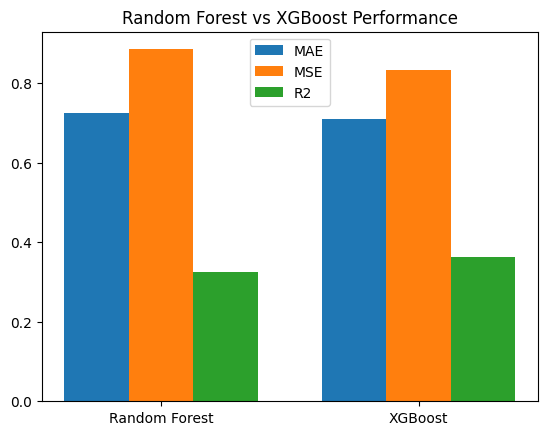

In [21]:
#bar graph to show comparisons
models = ["Random Forest", "XGBoost"]
mae = [rf_mae, xgb_mae]
mse = [rf_mse, xgb_mse]
r2 = [rf_r2, xgb_r2]
x=np.arange(len(models))
width = 0.25
plt.figure()
plt.bar(x - width, mae, width, label = "MAE")
plt.bar(x, mse, width, label = "MSE")
plt.bar(x + width, r2, width, label = "R2")
plt.xticks(x, models)
plt.title("Random Forest vs XGBoost Performance")
plt.legend()
plt.show()

KNN vs Random Forest Comparison for Longitude and Longitude as they relate to median house value

In [22]:
#KNN
X = df[['Latitude', 'Longitude']]
y = df['MedHouseVal']

#test train split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred= knn.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
print("KNN Performnce")
print("MAE:", mean_absolute_error(y_test, knn_pred))
print("MSE:", mean_squared_error(y_test, knn_pred))
print("R2:", r2_score(y_test, knn_pred))


KNN Performnce
MAE: 0.3313917126937984
MSE: 0.26692156030619857
R2: 0.7963066762069079


In [23]:
#random forest on latitude and longitude
rf2 = RandomForestRegressor(random_state=42)
rf2.fit(X_train, y_train)
rf2_pred = rf2.predict(X_test)
rf2_mae = mean_absolute_error(y_test, rf2_pred)
rf2_mse = mean_squared_error(y_test, rf2_pred)
rf2_r2 = r2_score(y_test, rf2_pred)
print("Randoom Forest Performnce")
print("MAE:", mean_absolute_error(y_test, rf2_pred))
print("MSE:", mean_squared_error(y_test, rf2_pred))
print("R2:", r2_score(y_test, rf2_pred))

Randoom Forest Performnce
MAE: 0.319866426066442
MSE: 0.2624418697214385
R2: 0.7997252200807248


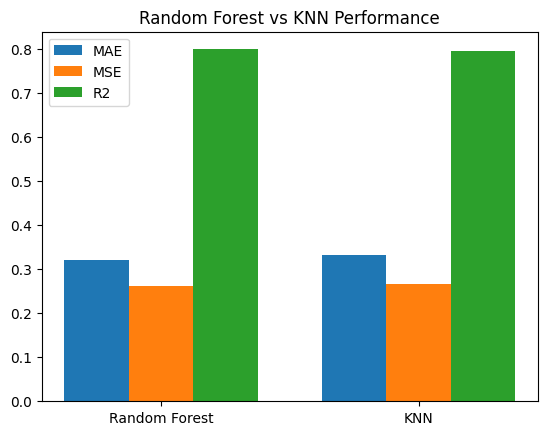

In [24]:
#bar graph to show comparisons
models = ["Random Forest", "KNN"]
mae = [rf2_mae, knn_mae]
mse = [rf2_mse, knn_mse]
r2 = [rf2_r2, knn_r2]
x=np.arange(len(models))
width = 0.25
plt.figure()
plt.bar(x - width, mae, width, label = "MAE")
plt.bar(x, mse, width, label = "MSE")
plt.bar(x + width, r2, width, label = "R2")
plt.xticks(x, models)
plt.title("Random Forest vs KNN Performance")
plt.legend()
plt.show()

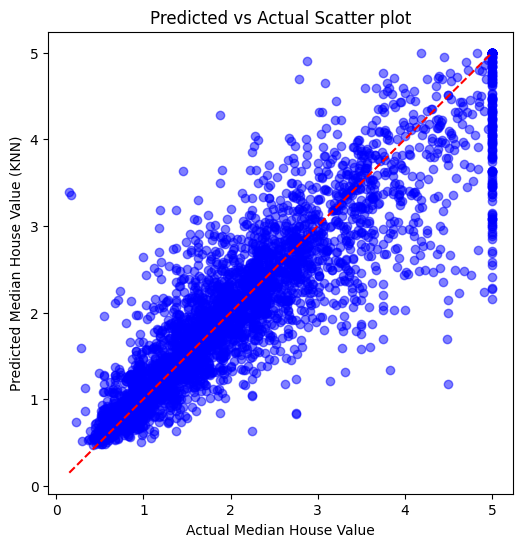

In [25]:
plt.figure(figsize = (6, 6))
plt.scatter(y_test, knn_pred, alpha=0.5, color = 'blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value (KNN)")
plt.title("Predicted vs Actual Scatter plot")
plt.show()

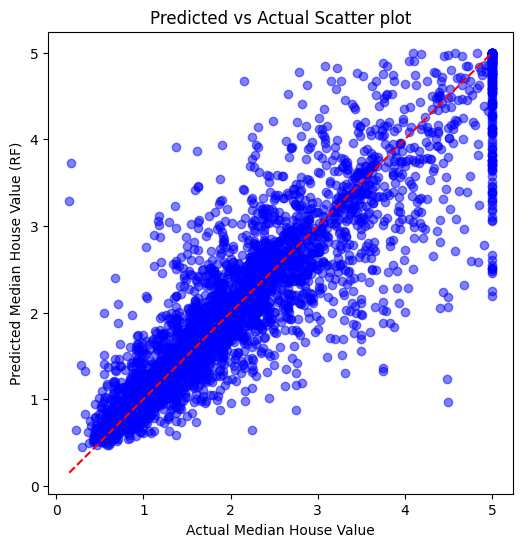

In [26]:
plt.figure(figsize = (6, 6))
plt.scatter(y_test, rf2_pred, alpha=0.5, color = 'blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value (RF)")
plt.title("Predicted vs Actual Scatter plot")
plt.show()

In [27]:
mae_lr = mae
mse_lr = mse
r2_lr = r2
metrics_df  = pd.DataFrame({
    "Model":["Linear Regression", "Neural Network", "Random Forest Features", "XGBBoost", "Random Forest Longitude And Latitude", "KNN"],
    "MAE": [mae_lr, nn_mae, rf_mae, xgb_mae, rf2_mae, knn_mae],
    "MSE": [mse_lr, nn_mse, rf_mse, xgb_mse, rf2_mse, knn_mse],
    "R2": [r2_lr, nn_r2, rf_r2, xgb_r2, rf2_r2, knn_r2]
})
pred_df = pd.DataFrame({
    "Actual":y_test,
    "Predicited":y_pred
})
summary_df = X.describe()
corr_df = X.corr()
with pd.ExcelWriter("jupyterdata.xlsx") as writer:
    metrics_df.to_excel(writer, sheet_name = "Model Metrics", index = False)
    pred_df.to_excel(writer, sheet_name = "Predictions", index =False)
    summary_df.to_excel(writer, sheet_name = "Summary Stats")
    corr_df.to_excel(writer, sheet_name = "Correlations")



In [28]:
full_df = pd.DataFrame(X, columns = X.columns if hasattr(X, "columns") else None)
try: 
    full_df["Target"] = y
except:
    pass
full_df.to_excel("dataset.xlsx", index = False)



For scenario 1 median income will be increased by 25% and the expected output is that the neural network will predict higher median households since the median income is correlated with median house value

Scenario 1 Baseline Average: 2.06, Scenario Average: 2.07, Change: 0.01


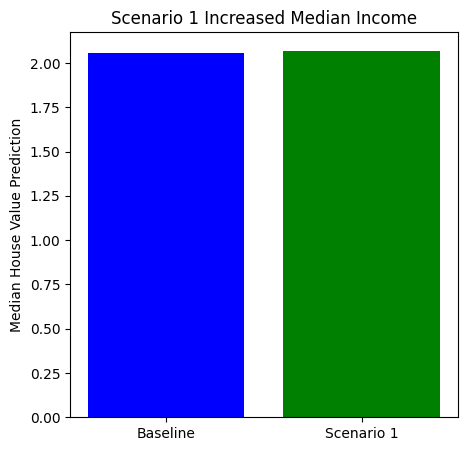

In [31]:
#baseline predictions
baseline_pred = nn_model.predict(X_scaled)
baseline_mean = baseline_pred.mean()
#scenario 1 increase median income by 25%
scenario1 = X_scaled.copy()
medinc_idx = list(X_scaled.columns).index('MedInc')
#multiply median income by 25%
scenario1.iloc[:, medinc_idx] *= 1.25
scenario1_pred = nn_model.predict(scenario1)
scenario1_mean = scenario1_pred.mean()
change = scenario1_mean - baseline_mean
print(f"Scenario 1 Baseline Average: {baseline_mean:.2f}, Scenario Average: {scenario1_mean:.2f}, Change: {change:.2f}")
plt.figure(figsize = (5,5))
plt.bar(['Baseline', 'Scenario 1'], [baseline_mean, scenario1_mean], color = ['blue', 'green'])
plt.ylabel('Median House Value Prediction')
plt.title('Scenario 1 Increased Median Income')
plt.show()

scenario 2 will increase the population by 30% and average occupancy by 15% to simulate population growth. the expected outcome is the model may predict lower median house values

Scenario 2 Average Prediction: 2.10, Change vs Baseline: 0.04


<function matplotlib.pyplot.show(close=None, block=None)>

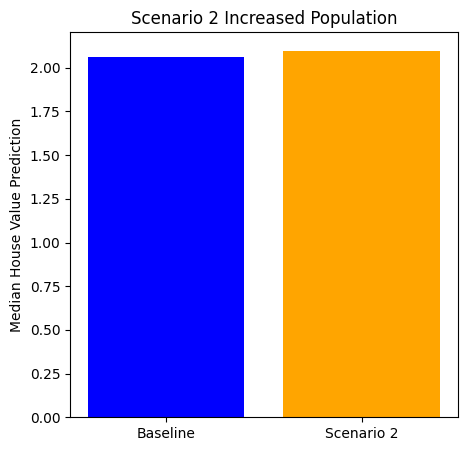

In [35]:
scenario2 = X_scaled.copy()
pop_idx = list(X_scaled.columns).index('Population')
occup_idx = list(X_scaled.columns).index('AveOccup')
scenario2.iloc[:, pop_idx]*=1.30
scenario2.iloc[:, occup_idx]*=1.15
#prediction
scenario2_pred = nn_model.predict(scenario2)
scenario2_mean = scenario2_pred.mean()
change2 = scenario2_mean - baseline_mean
print(f"Scenario 2 Average Prediction: {scenario2_mean:.2f}, Change vs Baseline: {change2:.2f}")
plt.figure(figsize=(5,5))
plt.bar(['Baseline', 'Scenario 2'], [baseline_mean, scenario2_mean], color = ['blue', 'orange'])
plt.ylabel('Median House Value Prediction')
plt.title('Scenario 2 Increased Population')
plt.show

scenario 3 increased age of the homes and the model should predict a lower median house value since older houses are less desirable

Scenario 3 Average Prediction: 2.07, Change vs Baseline: 0.01


<function matplotlib.pyplot.show(close=None, block=None)>

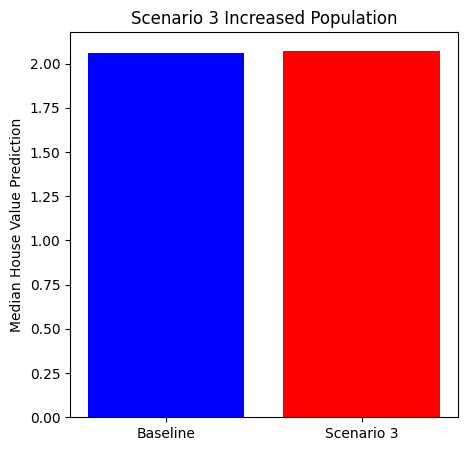

In [36]:
scenario3 = X_scaled.copy()
age_idx = list(X_scaled.columns).index('HouseAge')
scenario3.iloc[:, age_idx] *= 1.25
#prediction
scenario3_pred = nn_model.predict(scenario3)
scenario3_mean = scenario3_pred.mean()
change3 = scenario3_mean - baseline_mean

print(f"Scenario 3 Average Prediction: {scenario3_mean:.2f}, Change vs Baseline: {change3:.2f}")
plt.figure(figsize=(5,5))
plt.bar(['Baseline', 'Scenario 3'], [baseline_mean, scenario3_mean], color = ['blue', 'red'])
plt.ylabel('Median House Value Prediction')
plt.title('Scenario 3 Increased Population')
plt.show

In [38]:
scenario_summary = pd.DataFrame({
    'Scenario':['Scenario 1: Higher Income', 'Scenario 2: Higher Population and Density', 'Scenario 3: Older Houses'],
    'Baseline Average':[baseline_mean, baseline_mean, baseline_mean],
    'Scenario Average':[scenario1_mean, scenario2_mean, scenario3_mean],
    'Change vs Baseline':[change, change2, change3]
})
scenario_summary.to_excel("scenario_summary.xlsx", index=False)
scenario_summary

,Scenario,Baseline Average,Scenario Average,Change vs Baseline
0,Scenario 1: Higher Income,2.059564,2.070276,0.010712
1,Scenario 2: Higher Population and Density,2.059564,2.098346,0.038782
2,Scenario 3: Older Houses,2.059564,2.073005,0.013442
